In [516]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal, ROUND_DOWN, ROUND_UP
from kmeans import kmeans_alg, cluster, distance_interface, sized_fifo


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [512]:
def cosine_distance(m1, m2):
    dist = (1 - sp.distance.cdist(matrix1, matrix2, 'cosine'))
    return dist

def euclidean_distance(m1, m2):
    dist = np.linalg.norm(m2 - m1)
    return dist

In [524]:
sf = sized_fifo.SizedFifo(1, 2)
sf.prepend(2)
sf.prepend(3)
sf.get()

[3, 2]

In [232]:
list1 = [[1,1]]
list2 = [[1,1]] 

matrix1 = np.asarray(list1)
matrix2 = np.asarray(list2)

In [446]:
def vector_distance_max_min(m1, m2):
    m1_dist = np.max(m1) - np.min(m1)
    m2_dist = np.max(m2) - np.min(m2)
    result = np.abs(m2_dist - m1_dist)
    return result  


def peak_to_average_ratio(u):
    peak_load = max(u)
    average_load = (1/u.shape[0])*np.sum(u)
    return peak_load/average_load - 1



def vector_distance_component_contribution(u, v):
    diff = np.abs(v + u)
    if(np.mean(diff) == diff[0]):
        return 1
    diffMean = np.sum(np.mean(diff))
    distanceToMean = np.abs(diff - diffMean)
    distanceToMeanNorm = np.sum(distanceToMean)
    contribution = distanceToMean/distanceToMeanNorm
    desiredContribution = 1/diff.shape[0]
    roundedDesiredContribution = float(Decimal(desiredContribution).quantize(Decimal('.001'), rounding=ROUND_UP))
    #print("contribution: %s" % contribution)
    correctness = 0
    for e in contribution:
        if (e < roundedDesiredContribution):
            correctness = correctness + desiredContribution
                        
    return 1 - correctness


def vector_distance_contribution_and_par(u, v):
    par_u = peak_to_average_ratio(u)
    par_v = peak_to_average_ratio(v)
    par_uv = peak_to_average_ratio(u + v)
    
    par_resolution = 0
    if (par_uv < par_u and par_uv < par_v):
        par_resolution = 1
    else:
        par_resolution = 0
    
    vector_distance = vector_distance_component_contribution(u, v)
    return 1*par_resolution

In [447]:
class PeakToAverageDistance(object):
    
    #def __init(self, upper_threshold):
        #self.upper_threshold = upper_threshold
        
    def calculate_distance(self, u, v):
        """
        Calculate distance between vectors u and v
        :param u: a vector
        :param v: a vector
        :return: distance between u and v
        """
        return vector_distance_max_min(u, v)

    def calculate_error(self, clusters):
        """
        Return error between clusters
        :param clusters: all clusters
        :return: error between clusters
        """
        accumulated_distances = 0
        num_points = 0
        for cluster in clusters:
            num_points += len(cluster.points)
            accumulated_distances += cluster.total_distance()
    
        error = accumulated_distances / num_points
        return -error

In [448]:
d = PeakToAverageDistance()

v = np.asarray([2, 3, 3])
u = np.asarray([3, 2, 2])
print(d.calculate_distance(u, v))
v = np.asarray([3, 2, 4])
u = np.asarray([3, 3, 6])
print(d.calculate_distance(u, v))
v = np.asarray([20, 30, 40])
u = np.asarray([3, 2, 2])
print(d.calculate_distance(u, v))
v = np.asarray([19, 50, 40])
u = np.asarray([3, 2, 2])
print(d.calculate_distance(u, v))
v = np.asarray([0, 7, 7, 0])
u = np.asarray([5, 5, 0, 0])
print(d.calculate_distance(u, v))

0
1
19
30
2


In [ ]:
# Example
#points = np.asarray([[0, 7, 7, 0], [8, 0, 0, 7], [ 5, 5, 0, 0], [0, 0, 5, 5], [5, 5, 5, 5], [0, 7, 7, 0], [8, 0, 0, 7], [ 5, 5, 0, 0], [0, 0, 5, 5], [5, 5, 5, 5], [0, 7, 7, 0], [8, 0, 0, 7], [ 5, 5, 0, 0], [0, 0, 5, 5], [5, 5, 5, 5], [0, 7, 7, 0], [8, 0, 0, 7], [ 5, 5, 0, 0], [0, 0, 5, 5], [5, 5, 5, 5], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [1, 8, 9 ,10], [6, 7, 3, 2], [4, 3, 2, 1], [6, 7, 3, 2]])
points = np.asarray([[0, 7, 7, 0], [8, 0, 0, 7], [ 5, 5, 0, 0], [0, 0, 5, 5]])
# ymeans,centers,clusters = kmeans_alg.iterative_kmeans(points, 4, 0.2, 10, PeakToAverageDistance())
ymeans, centers, clusters = kmeans_alg.iterative_kmeans(points, 2, 0.2, 2, PeakToAverageDistance(), silent=False)
# centers
print(len(points))

NameError: name 'np' is not defined

In [534]:
len(clusters)

1

[[ 0.  7.  7.  0.]
 [ 8.  0.  0.  7.]
 [ 5.  5.  0.  0.]
 [ 0.  0.  5.  5.]]


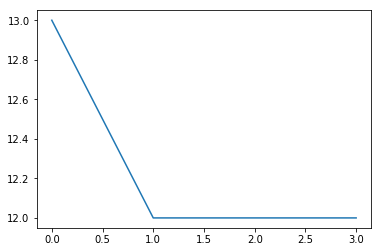

In [393]:
for k in range(0, len(centers)):
    print(clusters[k])
    plt.plot(range(0, centers.shape[1]), centers[k])

In [384]:
from scipy.signal import argrelextrema

x = np.random.random(12)

# for local maxima
argrelextrema(x, np.greater)

# for local minima
argrelextrema(x, np.less)

(array([1, 5, 8]),)

In [271]:
np.sum([np.array([1,3]),np.array([2,8])], 0)

array([ 3, 11])

In [290]:
synthethic_data = np.genfromtxt('./work/files/UserRanges.csv', delimiter=',', skip_header=1)
synthethic_data

array([[   0.,   20.,  120., ...,  106.,   19.,  176.],
       [   0.,    0.,   17., ...,   81.,  108.,   60.],
       [   0.,  100.,    0., ...,   51.,  175.,  207.],
       ..., 
       [   0.,  241.,  148., ...,    0.,  145.,  110.],
       [   0.,   29.,    0., ...,   57.,   61.,   25.],
       [   0.,   15.,   20., ...,   33.,   67.,  204.]])

In [294]:
index = 0
iterations = 200
ks = range(2, 5)
cutoff = 0.1

ymeans, centers, clusters = kmeans_alg.iterative_kmeans(synthethic_data, k, cutoff, iterations, PeakToAverageDistance(), silent=True)
experiments = []

dataframe = pd.DataFrame.from_records([{"k": 0, "cutoff": 0, "iterations": 0, "k out": 0, "e. index": 0}], index="e. index")

for k in ks:
    ymeans, centers, clusters = kmeans_alg.iterative_kmeans(synthethic_data, k, cutoff, iterations, PeakToAverageDistance(), silent=True)
    index = index + 1
    dataframe = dataframe.append({"k": k, "cutoff": cutoff, "iterations": iterations, "k out": len(clusters), "e. index": index}, ignore_index=True)
    experiments = experiments + [{
                            "clusters": clusters,
                            "ymeans": ymeans,
                            "centers": centers
                            }]
    

dataframe = dataframe.drop(0)
dataframe[["k", "iterations", "k out", "e. index"]] = dataframe[["k", "iterations", "k out", "e. index"]].astype(np.int64)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [295]:
dataframe

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cutoff</th>
      <th>iterations</th>
      <th>k</th>
      <th>k out</th>
      <th>e. index</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.1</td>
      <td>200</td>
      <td>2</td>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.1</td>
      <td>200</td>
      <td>3</td>
      <td>3</td>
      <td>2</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.1</td>
      <td>200</td>
      <td>4</td>
      <td>2</td>
      <td>3</td>
    </tr>
  </tbody>
</table>
</div>

dataframe: 0
110
9
dataframe: 1
110
3
6
dataframe: 2
110


9


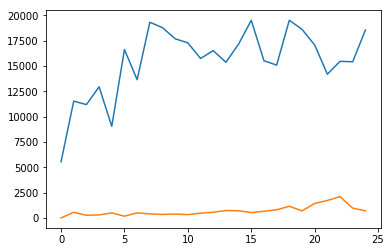

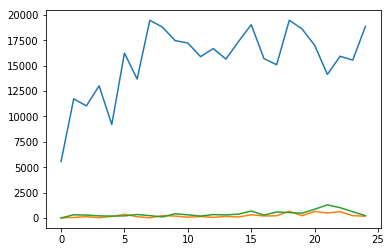

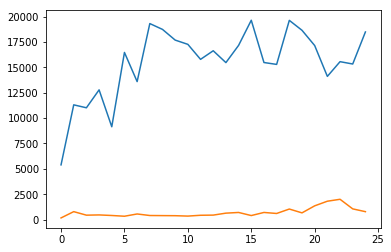

In [296]:
for i in range(0, len(dataframe)):
    print("dataframe: %s" % i)
    plt.figure(i)
    for c in range(0, dataframe.iloc[i]["k out"].astype(np.int64)):
        print(len(experiments[i]["clusters"][c].points))
        plt.plot(range(0, 25), experiments[i]["centers"][c])


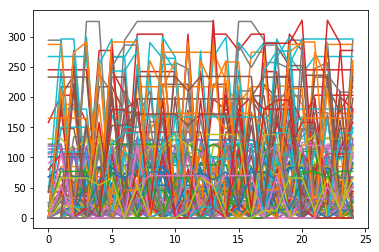

In [260]:
for i in range(0, synthethic_data.shape[0]):
    plt.plot(range(0, 25), synthethic_data[i])